# Homework 2

## 2. Problem 1: Small dataset (Autograded)

### 1. Loading the Data

In [40]:
import numpy as np

location = 'p1/X.npy'
x_data = np.load(location)
x_data.shape


(511, 45768)

In [9]:
max = 0
for row in x_data:
   if row[0] > max:
      max = row[0]
print(max)

11.941397591320595


In [28]:
first_colum = x_data[:,0]
maximo = np.max(first_colum)
print(maximo)

11.941397591320595


### 2. Transform the Data

In [25]:
def log_transform(data):
    arr_modificado = data.copy()
    arr_modificado = np.log2(arr_modificado + 1)
    return arr_modificado

x_data_transform = log_transform(x_data)

maximo = np.max(x_data_transform[:,0])
print(maximo)

3.6939215228197613


### 3. Principal Components and Explained Variance

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Initialize PCA with desired number of components
pca = PCA(n_components=2) # Retain 2 principal components
# Fit PCA to the scaled data and transform it
pca.fit(x_data)
print("Explained variance ratio for 1 PC:", pca.explained_variance_ratio_[0])
print("Explained variance ratio for 2 PC:", pca.explained_variance_ratio_[1])

Explained variance ratio for 1 PC: 0.4277967098357279
Explained variance ratio for 2 PC: 0.14804007760233415


In [16]:
# Initialize PCA with desired number of components
pca_transform = PCA(n_components=2) # Retain 2 principal components

# Fit PCA to the scaled data and transform it
pca_transform.fit(x_data_transform)
print("Explained variance ratio for 1 PC:", pca_transform.explained_variance_ratio_[0])
print("Explained variance ratio for 2 PC:", pca_transform.explained_variance_ratio_[1])

Explained variance ratio for 1 PC: 0.13887564870826166
Explained variance ratio for 2 PC: 0.06882332233163974


In [13]:
import numpy as np
from sklearn.decomposition import PCA

# 1. Calcular PCA UNA SOLA VEZ para todos los componentes
pca_full = PCA(n_components=None) 
pca_full.fit(x_data)

# 2. Calcular la varianza explicada CUMULATIVA
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 3. Encontrar el índice donde la varianza acumulada supera o iguala el 85% (0.85)
# np.argmax devuelve el índice de la primera aparición de True
# Se suma +1 porque los índices de Python comienzan en 0.
n_pcs_85 = np.argmax(cumulative_variance >= 0.85) + 1

# Mostrar el resultado
print(f"Número de PCs necesarios para el 85% de la varianza: {n_pcs_85}")
print(f"Varianza explicada con {n_pcs_85} PCs: {cumulative_variance[n_pcs_85 - 1]:.6f}")

Número de PCs necesarios para el 85% de la varianza: 36
Varianza explicada con 36 PCs: 0.850094


In [17]:
# 1. Calcular PCA UNA SOLA VEZ para todos los componentes
pca_full = PCA(n_components=None) 
pca_full.fit(x_data_transform)

# 2. Calcular la varianza explicada CUMULATIVA
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 3. Encontrar el índice donde la varianza acumulada supera o iguala el 85% (0.85)
# np.argmax devuelve el índice de la primera aparición de True
# Se suma +1 porque los índices de Python comienzan en 0.
n_pcs_85 = np.argmax(cumulative_variance >= 0.85) + 1

# Mostrar el resultado
print(f"Número de PCs necesarios para el 85% de la varianza: {n_pcs_85}")
print(f"Varianza explicada con {n_pcs_85} PCs: {cumulative_variance[n_pcs_85 - 1]:.6f}")

Número de PCs necesarios para el 85% de la varianza: 339
Varianza explicada con 339 PCs: 0.850251


### 4. Plotting without Visualization Technique

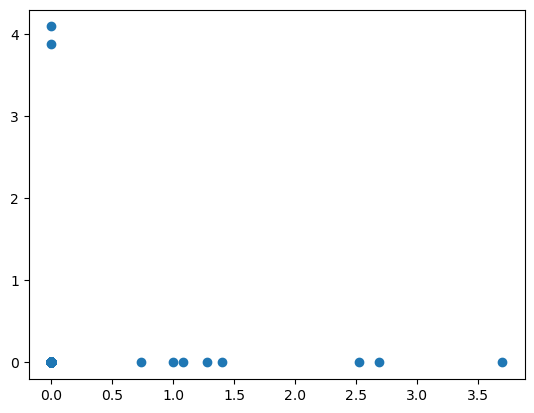

In [28]:
import matplotlib.pyplot as plt


columns_1_2 = x_data_transform[:,0:2].copy()

plt.scatter(columns_1_2[:,0], columns_1_2[:,1])
plt.show()


### 5. PCA

In [33]:
pca_transfomed = PCA(n_components=2)  # nos quedamos solo con los 2 primeros
X_pca = pca_transfomed.fit_transform(x_data_transform)  # <-- proyecciones de los datos

print("Shape de X_pca:", X_pca.shape)  # (150, 2)

Shape de X_pca: (511, 2)


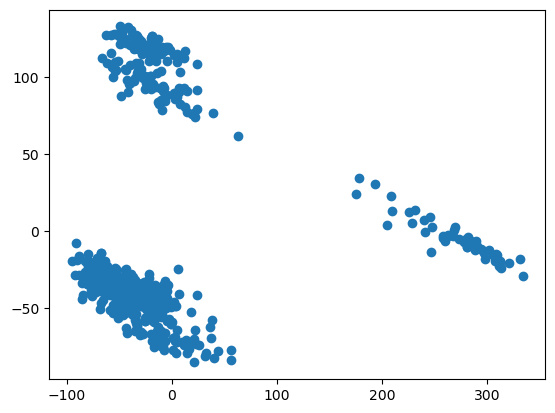

In [34]:

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

### 6. MDS

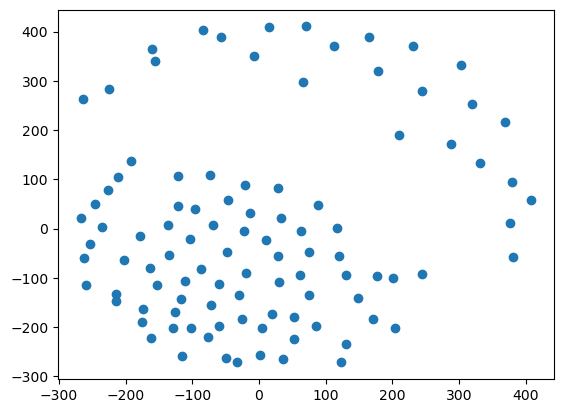

In [36]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(x_data_transform[:100])

plt.scatter(X_mds[:,0], X_mds[:,1])
plt.show()

### 8. T-SNE

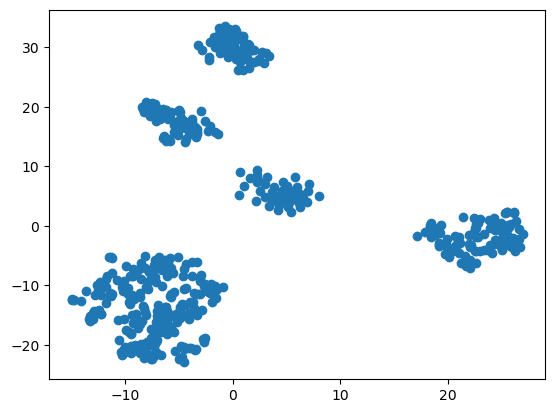

In [39]:
from sklearn.manifold import TSNE


X_pca50 = PCA(n_components=50).fit_transform(x_data_transform)

# 2. Aplicar T-SNE sobre los 50 PCs
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(X_pca50)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.show()

## 3. Clustering

In [ ]:
location = 'p1/y.npy'
y_data = np.load(location)
y_data.shape


(511,)

c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means ejecutado con 5 clusters. Etiquetas generadas.


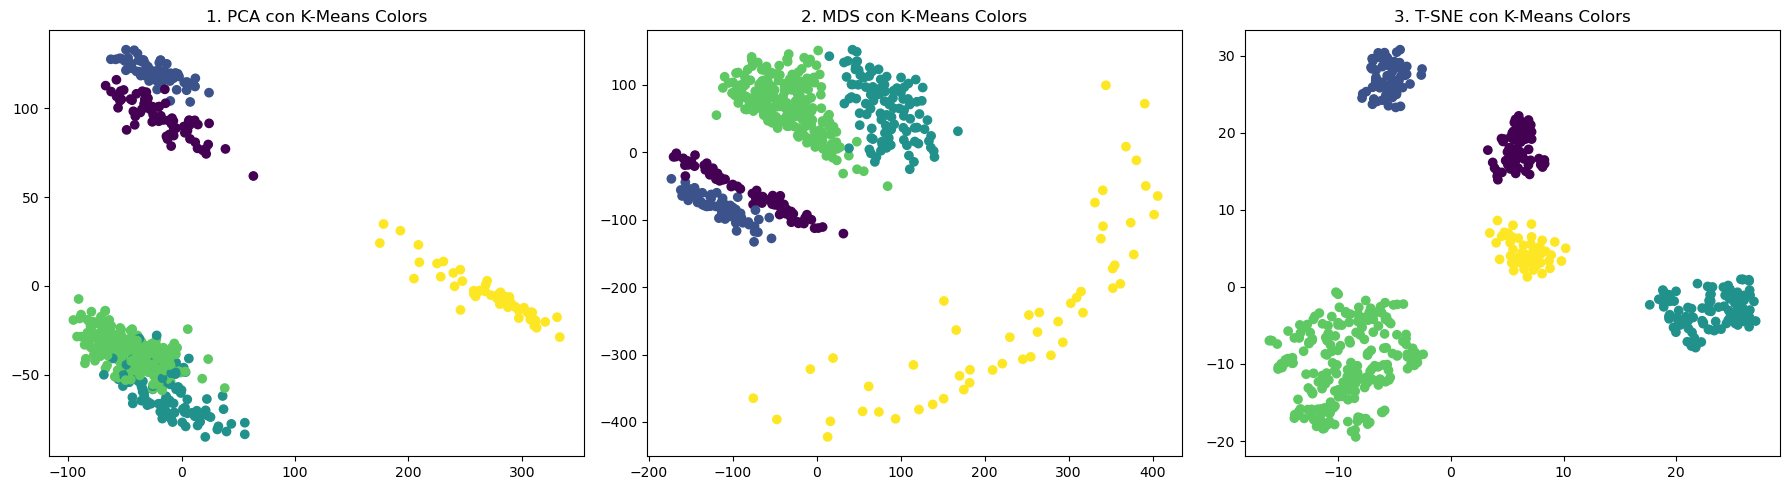

In [45]:
from sklearn.cluster import KMeans

# Reducir a 50 PCs (Como se hizo en el paso anterior)
pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(x_data_transform)


# =======================================================
# PARTE 1: CLUSTERING K-MEANS
# =======================================================

# ATENCIÓN: Debes reemplazar 'N_CLUSTERS' con el número de clusters (k)
# que seleccionaste mirando el gráfico de t-SNE de la parte anterior.
N_CLUSTERS = 5 # <--- ¡CAMBIA ESTE VALOR! (Suele ser 5, 8, 10, etc.) 

# Aplicar K-Means a los datos proyectados en 50 PCs
kmeans = KMeans(n_clusters=N_CLUSTERS)
cluster_labels = kmeans.fit_predict(X_pca50)
print(f"K-Means ejecutado con {N_CLUSTERS} clusters. Etiquetas generadas.")


# =======================================================
# PARTE 2: CALCULAR PROYECCIONES 2D (PCA, MDS, t-SNE)
# =======================================================

# 1. PCA (Reducción a 2D)
pca2d = PCA(n_components=2)
X_pca2d = pca2d.fit_transform(x_data_transform)

# 2. MDS (Sobre los 50 PCs, como práctica común)
# MDS es sensible al tamaño del dataset. Si es muy grande, tarda mucho.
# Se usa 'n_init=1' para evitar el error de grader, aunque 10 es mejor para calidad.
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_pca50)

# 3. t-SNE (Usando los mismos parámetros de la parte anterior, n_components=2)
tsne = TSNE(n_components=2, perplexity=40)
X_tsne = tsne.fit_transform(X_pca50)


# =======================================================
# PARTE 3: VISUALIZACIÓN Y ANÁLISIS
# =======================================================

plt.figure(figsize=(18, 5))

# --- GRÁFICO 1: PCA ---
plt.subplot(1, 3, 1)
plt.scatter(X_pca2d[:, 0], X_pca2d[:, 1], c=y_data)
plt.title('1. PCA con K-Means Colors')

# --- GRÁFICO 2: MDS ---
plt.subplot(1, 3, 2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_data)
plt.title('2. MDS con K-Means Colors')

# --- GRÁFICO 3: T-SNE ---
plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_data)
plt.title('3. T-SNE con K-Means Colors')

plt.tight_layout()
plt.show()